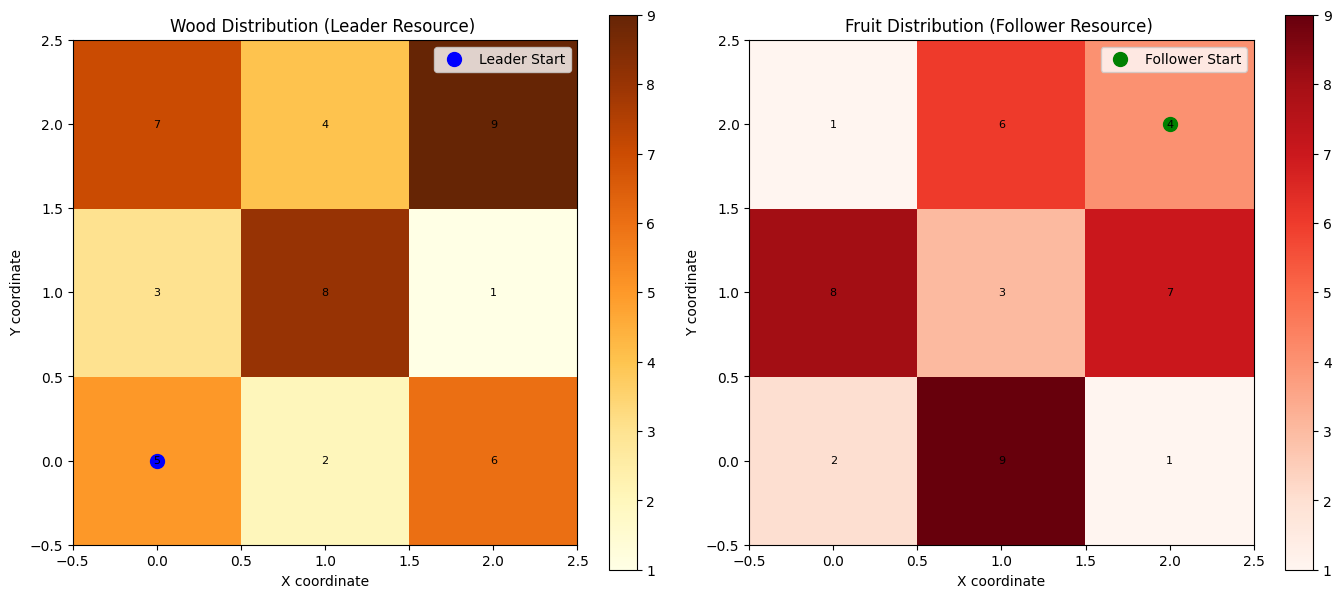

In [10]:
from src.forest_game import ForestCollectionMDP
import numpy as np

# Create custom forest map
forest_map = np.array([
    [[5, 2], [3, 8], [7, 1]],
    [[2, 9], [8, 3], [4, 6]],
    [[6, 1], [1, 7], [9, 4]]
])


# Initialize game
game = ForestCollectionMDP(
    grid_size=(3, 3),
    forest_map=forest_map,
    leader_start=(0, 0),
    follower_start=(2, 2),
    max_steps_leader=1,
    max_steps_follower=1,
    leader_starts_first=True
)

# Visualize the forest
game.visualize_forest()

Optimal solution: Leader=4.50, Follower=0.00


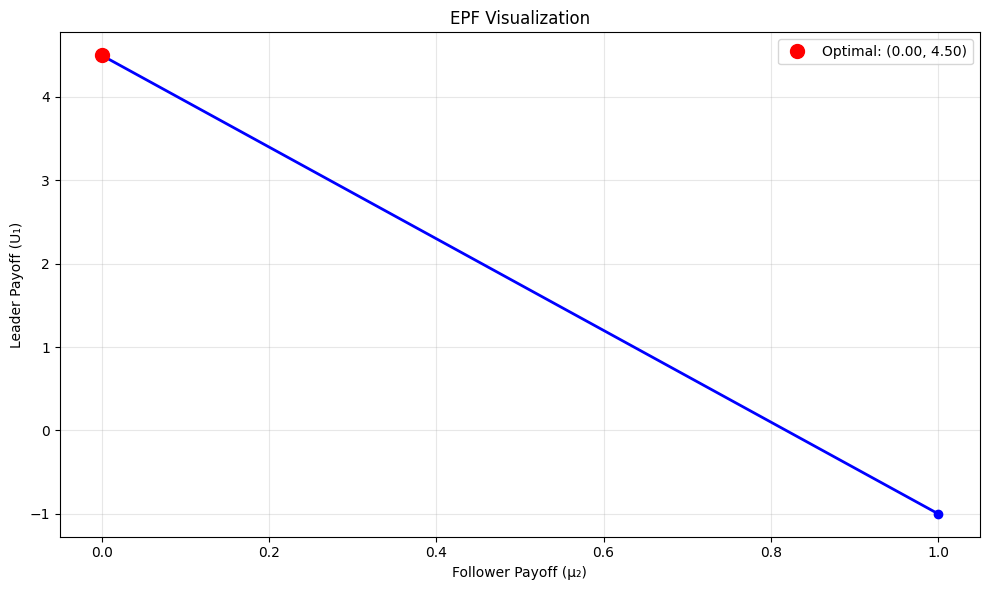

In [3]:
# Build our own test tree
from src.solvers.forest_epf_solver import GameNode, ForestEPFSolver

def build_tree() -> GameNode:
    root_follower_node = GameNode(state=None, player=1, is_terminal=False)
    end_node_1 = GameNode(state=None, player=1, is_terminal=True)
    end_node_2 = GameNode(state=None, player=1, is_terminal=True)

    epf1 = EPF()
    epf1.add_point(-1, 10)
    end_node_1.epf = epf1

    epf2 = EPF()
    epf2.add_point(1, -1)
    end_node_2.epf = epf2

    leader_node_1 = GameNode(state=None, player=0, is_terminal=False)
    leader_node_2 = GameNode(state=None, player=0, is_terminal=True)

    epf3 = EPF()
    epf3.add_point(0, 0)
    leader_node_2.epf = epf3

    root_follower_node.add_child(Action.DOWN, leader_node_1)
    root_follower_node.add_child(Action.UP, leader_node_2)
    leader_node_1.add_child(Action.DOWN, end_node_1)
    leader_node_1.add_child(Action.UP, end_node_2)

    return root_follower_node

tree = build_tree()
solver = ForestEPFSolver(None)

solver._compute_epfs(tree)

mu2_opt, u1_opt = tree.epf.get_maximum_point()
print(f"Optimal solution: Leader={u1_opt:.2f}, Follower={mu2_opt:.2f}")
solver.visualize_epf(tree)


Optimal solution: Leader=4.50, Follower=0.00


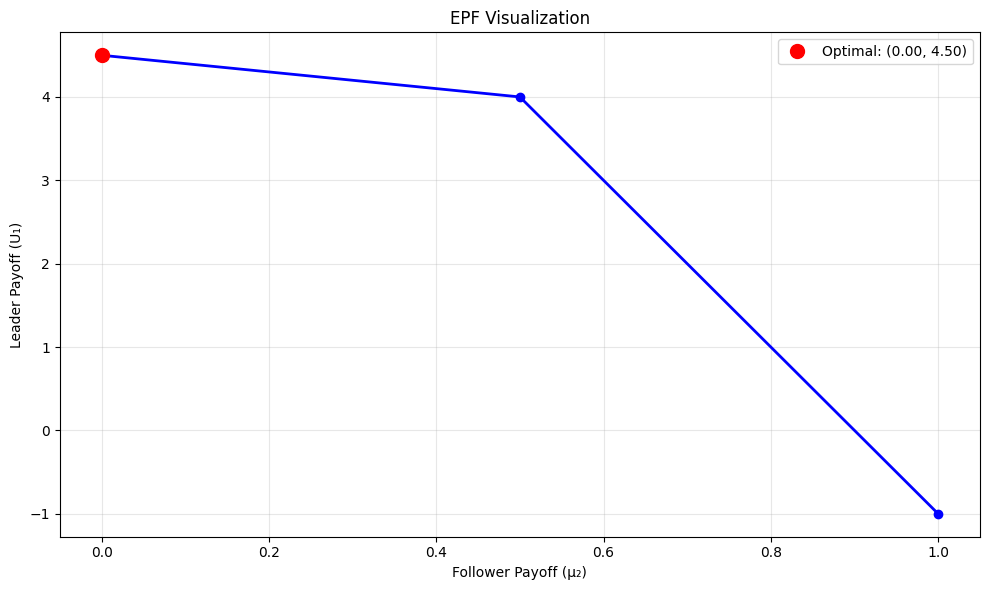

In [2]:
# Build our own test tree
from src.solvers.forest_epf_solver import GameNode, EPF, Action, ForestEPFSolver

def build_tree() -> GameNode:
    root_follower_node = GameNode(state=None, player=1, is_terminal=False)
    end_node_1 = GameNode(state=None, player=1, is_terminal=True)
    end_node_2 = GameNode(state=None, player=1, is_terminal=True)
    end_node_3 = GameNode(state=None, player=1, is_terminal=True)
    end_node_4 = GameNode(state=None, player=1, is_terminal=True)

    # Set EPFs after creation
    epf1 = EPF()
    epf1.add_point(-1, 10)
    end_node_1.epf = epf1

    epf2 = EPF()
    epf2.add_point(1, -1)
    end_node_2.epf = epf2

    epf3 = EPF()
    epf3.add_point(0, 0)
    end_node_3.epf = epf3

    epf4 = EPF()
    epf4.add_point(0.5, 4)
    end_node_4.epf = epf4

    leader_node_1 = GameNode(state=None, player=0, is_terminal=False)
    leader_node_2 = GameNode(state=None, player=0, is_terminal=False)


    root_follower_node.add_child(Action.DOWN, leader_node_1)
    root_follower_node.add_child(Action.UP, leader_node_2)
    leader_node_1.add_child(Action.DOWN, end_node_1)
    leader_node_1.add_child(Action.UP, end_node_2)
    leader_node_2.add_child(Action.DOWN, end_node_3)
    leader_node_2.add_child(Action.UP, end_node_4)

    # Debug: check EPFs are set correctly

    return root_follower_node

tree = build_tree()
solver = ForestEPFSolver(None)

solver._compute_epfs(tree)

mu2_opt, u1_opt = tree.epf.get_maximum_point()
print(f"Optimal solution: Leader={u1_opt:.2f}, Follower={mu2_opt:.2f}")
solver.visualize_epf(tree)


Building game tree...
Computing EPFs (Phase 1)...
Extracting strategy (Phase 2)...
Optimal solution: Leader=13.00, Follower=9.00


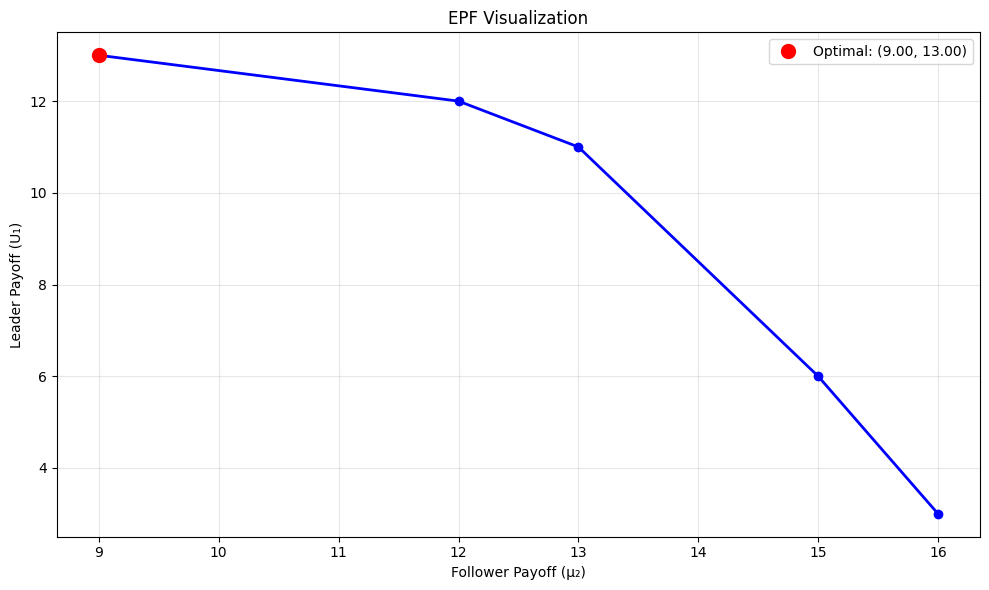

In [8]:
from src.solvers.forest_epf_solver import GameNode, EPF, Action, ForestEPFSolver
from src.forest_game import ForestCollectionMDP
import numpy as np

# Create custom forest map
forest_map = np.array([
    [[5, 2], [3, 8], [7, 1]],
    [[2, 9], [8, 3], [4, 6]],
    [[6, 1], [1, 7], [9, 4]]
])


# Initialize game
game = ForestCollectionMDP(
    grid_size=(3, 3),
    forest_map=forest_map,
    leader_start=(0, 0),
    follower_start=(2, 2),
    max_steps_leader=1,
    max_steps_follower=1,
    leader_starts_first=False
)


solver = ForestEPFSolver(game)
_, _, strategy = solver.solve(game.get_initial_state())
#solver.visualize_tree()
solver.visualize_epf(solver.game_tree)
# print("\nMixed strategy:")
# for state_key, actions in strategy.items():
#     if actions:
#         print(f"  {state_key}: {actions}")